<a href="https://colab.research.google.com/github/akinzayn/A-ST-504-Statistical-Software-Applications/blob/main/Mixed_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("pacman")
library(pacman)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
p_load(lme4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’



lme4 installed



In [ ]:
p_load(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’



lmtest installed



In [ ]:
p_load(RLRsim)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


RLRsim installed



In [ ]:
p_load(tidyverse)

In [ ]:
data_df = read.csv(file = "ambiguity.csv")
head(data_df)
#table(data_df$distID)

,name,ambiguity,distID,ideology,totalIssuePages,democrat,mismatch,incumbent,demHeterogeneity,attHeterogeneity,distLean
,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,"DUNBAR, FORREST",0.7399,200,-0.6268,9,1,1.03112030,0,0.5629564,NA,0.2498449
2,"YOUNG, DONALD E",0.6661,200,0.7771,15,0,0.37277970,1,0.5629564,NA,0.2498449
3,"LEFLORE, BURTON R",0.0156,101,0.3514,1,1,0.18188658,0,0.5845018,1.272789,0.3672764
4,"BYRNE, BRADLEY ROBERTS",0.3933,101,1.0819,7,0,0.54861342,1,0.5845018,1.272789,0.3672764
5,"WRIGHT, ERICK",0.3800,102,-0.0038,6,1,0.68480348,0,0.5906023,1.188103,0.5017814
6,"ROBY, MARTHA",-0.4444,102,0.7752,0,0,0.09419652,1,0.5906023,1.188103,0.5017814


In [ ]:
data_df$democrat = as.factor(data_df$democrat)
data_df$incumbent = as.factor(data_df$incumbent)
data_df$distID = as.factor(data_df$distID)
head(data_df, 2)

,name,ambiguity,distID,ideology,totalIssuePages,democrat,mismatch,incumbent,demHeterogeneity,attHeterogeneity,distLean
,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,"DUNBAR, FORREST",0.7399,200,-0.6268,9,1,1.0311203,0,0.5629564,NA,0.2498449
2,"YOUNG, DONALD E",0.6661,200,0.7771,15,0,0.3727797,1,0.5629564,NA,0.2498449


In [ ]:
data_df_cc = data_df[complete.cases(data_df),c("ambiguity", "incumbent" , "ideology" , "mismatch" ,  
"attHeterogeneity" , "demHeterogeneity", "democrat", "distID")]
dim(data_df_cc)

[1] 664   8

In [ ]:
mod1 = lmer(ambiguity ~ incumbent+ democrat + mismatch+ ideology+ attHeterogeneity+ demHeterogeneity+ (1|distID),data =data_df_cc, REML = FALSE)
mod1

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: 
ambiguity ~ incumbent + democrat + mismatch + ideology + attHeterogeneity +  
    demHeterogeneity + (1 | distID)
   Data: data_df_cc
     AIC      BIC   logLik deviance df.resid 
 12.7932  53.2777   2.6034  -5.2068      655 
Random effects:
 Groups   Name        Std.Dev. 
 distID   (Intercept) 6.812e-09
 Residual             2.410e-01
Number of obs: 664, groups:  distID, 396
Fixed Effects:
     (Intercept)        incumbent1         democrat1          mismatch  
        1.300704          0.126101          0.046363          0.008193  
        ideology  attHeterogeneity  demHeterogeneity  
       -0.056773         -0.227011         -1.031997  
optimizer (nloptwrap) convergence code: 0 (OK) ; 0 optimizer warnings; 1 lme4 warnings 

In [ ]:
mod2 = lmer(ambiguity ~ 1 +(1|distID), data =data_df_cc)
mod2

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: ambiguity ~ 1 + (1 | distID)
   Data: data_df_cc
REML criterion at convergence: 115.7647
Random effects:
 Groups   Name        Std.Dev.
 distID   (Intercept) 0.0000  
 Residual             0.2628  
Number of obs: 664, groups:  distID, 396
Fixed Effects:
(Intercept)  
     0.5325  
optimizer (nloptwrap) convergence code: 0 (OK) ; 0 optimizer warnings; 1 lme4 warnings 

In [ ]:
lrtest(mod1, mod2)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,2.603397,NA,NA,NA
2,3,-57.882351,-6,120.9715,1.018608e-23


In [ ]:
lrtstat <- as.numeric(2*(logLik(mod1)-logLik(mod2)))
pvalue <- pchisq(lrtstat,1,lower=FALSE)
data.frame(lrtstat, pvalue)

lrtstat,pvalue
<dbl>,<dbl>
120.9715,3.876619e-28


In [ ]:
y <- unlist(simulate(mod2))
length(y)


[1] 664

In [ ]:
lrstat <- numeric(1000)
set.seed(123)
for(i in 1:1000){
y <- unlist(simulate(mod2))
bnull <- lmer(y ~ 1 +(1|distID), data =data_df_cc)
balt <- lmer(y ~ incumbent+ mismatch+ ideology+ attHeterogeneity+ demHeterogeneity+ (1|distID), data_df_cc, REML=FALSE)
lrstat[i] <- as.numeric(2*(logLik(balt)-logLik(bnull)))
}

In [ ]:
mean(lrstat < 0.00001)

[1] 0

In [ ]:
mean(lrstat > 1)

[1] 1

In [ ]:
sqrt(0.011*0.981/1000)

[1] 0.003284966

In [ ]:
VarCorr(mod1)

 Groups   Name        Std.Dev.  
 distID   (Intercept) 6.8117e-09
 Residual             2.4102e-01

In [ ]:
as.data.frame(VarCorr(mod1))

grp,var1,var2,vcov,sdcor
<chr>,<chr>,<chr>,<dbl>,<dbl>
distID,(Intercept),NA,4.639937e-17,6.811708e-09
Residual,NA,NA,5.809251e-02,2.410239e-01


In [ ]:

lrstat= confint(mod1, method="boot")
lrstat

Computing bootstrap confidence intervals ...


500 message(s): boundary (singular) fit: see help('isSingular')




,2.5 %,97.5 %
.sig01,1.631614e-09,1.712691e-08
.sigma,2.250358e-01,2.527608e-01
(Intercept),9.852775e-01,1.684453e+00
incumbent1,8.753916e-02,1.616835e-01
democrat1,-4.428889e-03,9.368937e-02
mismatch,-2.496176e-02,4.370026e-02
ideology,-8.093902e-02,-3.079524e-02
attHeterogeneity,-4.142898e-01,-4.684599e-02
demHeterogeneity,-1.420947e+00,-6.838682e-01


In [ ]:
confint.merMod(mod1, method = "boot", boot.type = "perc", oldNames = F)
#Computing bootstrap confidence intervals ...

Computing bootstrap confidence intervals ...


500 message(s): boundary (singular) fit: see help('isSingular')




,2.5 %,97.5 %
sd_(Intercept)|distID,1.618337e-09,1.721251e-08
sigma,2.251451e-01,2.520212e-01
(Intercept),9.436117e-01,1.611682e+00
incumbent1,8.770408e-02,1.608693e-01
democrat1,-4.377117e-03,9.958770e-02
mismatch,-2.865867e-02,4.157007e-02
ideology,-8.129657e-02,-3.058698e-02
attHeterogeneity,-4.082342e-01,-3.673489e-02
demHeterogeneity,-1.443882e+00,-6.723504e-01


In [ ]:
# fit random intercepts model
intercepts_model <- lmer(ambiguity ~ demHeterogeneity  +(1|distID), data =data_df_cc)
intercepts_model

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: ambiguity ~ demHeterogeneity + (1 | distID)
   Data: data_df_cc
REML criterion at convergence: 103.5873
Random effects:
 Groups   Name        Std.Dev.
 distID   (Intercept) 0.0000  
 Residual             0.2603  
Number of obs: 664, groups:  distID, 396
Fixed Effects:
     (Intercept)  demHeterogeneity  
          0.9304           -0.7375  
optimizer (nloptwrap) convergence code: 0 (OK) ; 0 optimizer warnings; 1 lme4 warnings 

In [ ]:
# see group coefficients
model_coefs <- coef(intercepts_model)$distID %>% 
  rename(Intercept = `(Intercept)`, Slope = demHeterogeneity) %>% 
  rownames_to_column("distID")

# see coefficients

tail(model_coefs)



,distID,Intercept,Slope
,<chr>,<dbl>,<dbl>
391,5503,0.9304155,-0.7374697
392,5504,0.9304155,-0.7374697
393,5505,0.9304155,-0.7374697
394,5506,0.9304155,-0.7374697
395,5507,0.9304155,-0.7374697
396,5508,0.9304155,-0.7374697


In [ ]:
data_df_cc_ran <- left_join(data_df_cc, model_coefs, by = "distID")
head(data_df_cc_ran)
tail(data_df_cc_ran)

,ambiguity,incumbent,ideology,mismatch,attHeterogeneity,demHeterogeneity,democrat,distID,Intercept,Slope
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>
1,0.0156,0,0.3514,0.18188658,1.272789,0.5845018,1,101,0.9304155,-0.7374697
2,0.3933,1,1.0819,0.54861342,1.272789,0.5845018,0,101,0.9304155,-0.7374697
3,0.3800,0,-0.0038,0.68480348,1.188103,0.5906023,1,102,0.9304155,-0.7374697
4,-0.4444,1,0.7752,0.09419652,1.188103,0.5906023,0,102,0.9304155,-0.7374697
5,0.4260,0,0.0104,0.60999953,1.224224,0.5841383,1,103,0.9304155,-0.7374697
6,0.2193,1,-1.1222,1.74259953,1.224224,0.5841383,0,103,0.9304155,-0.7374697


,ambiguity,incumbent,ideology,mismatch,attHeterogeneity,demHeterogeneity,democrat,distID,Intercept,Slope
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>
659,0.4718,0,0.6411,0.2801322,1.221945,0.4794359,1,5401,0.9304155,-0.7374697
660,0.3856,1,0.7914,0.4304322,1.221945,0.4794359,0,5401,0.9304155,-0.7374697
661,0.2364,0,0.9631,0.6735159,1.205353,0.4841653,1,5402,0.9304155,-0.7374697
662,0.5191,0,2.0178,1.7282159,1.205353,0.4841653,0,5402,0.9304155,-0.7374697
663,0.6476,1,0.2994,0.2102582,1.217471,0.4979668,1,5403,0.9304155,-0.7374697
664,0.7544,0,-0.0190,0.5286582,1.217471,0.4979668,0,5403,0.9304155,-0.7374697


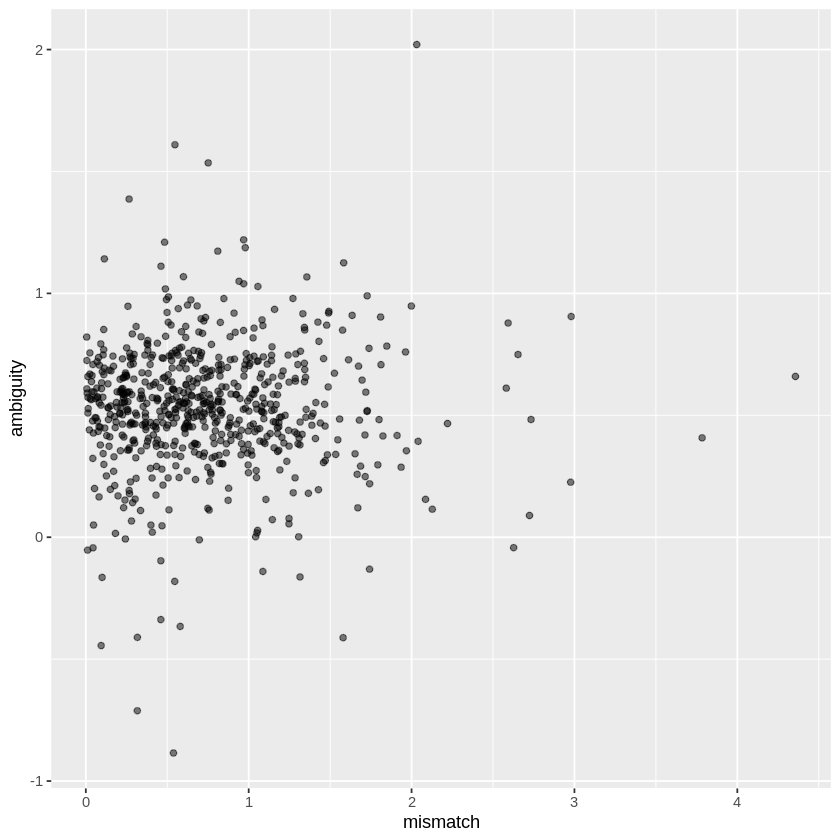

In [ ]:
model_coef_plot <- ggplot(data = data_df_cc_ran, 
       mapping = aes(x = mismatch, 
                     y = ambiguity
                     )
       ) +
  geom_point(na.rm = T, alpha = 0.5) 
#   geom_abline(aes(intercept = Intercept, 
#                  slope = Slope
# #                   colour = distID
#                   ),
#               size = 1.5
#               ) +
#   scale_y_continuous(limits = c(180, 1020)) +
#   scale_x_continuous(breaks = seq(1:10) - 1) +
#   theme(legend.position = "top")

# # # see the plot
  model_coef_plot

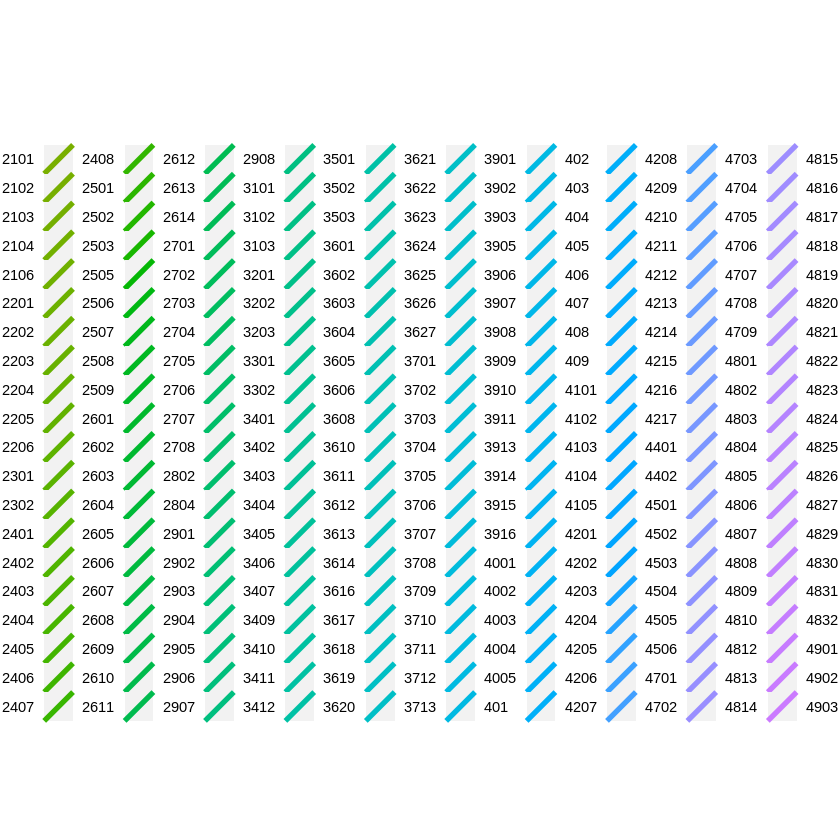

In [ ]:
model_coef_plot <- ggplot(data = data_df_cc_ran, 
      #  mapping = aes(x = mismatch, 
      #                y = ambiguity
      #                )
       ) +
  #geom_point(na.rm = T, alpha = 0.5) 
  geom_abline(aes(intercept = Intercept, 
                 slope = Slope,
                   colour = distID
                  ),
              size = 1.5
              ) 
  # scale_y_continuous(limits = c(180, 1020)) +
  # scale_x_continuous(breaks = seq(1:10) - 1) +
  #theme(legend.position = "top")

# # # see the plot
  model_coef_plot

In [ ]:
# Plotting fitted curve by distance, holding arsenic constant
a <- mean(data_df_cc$mismatch)
# Curve for no demHeterogeneity
 curve(lmer(ambiguity ~ demHeterogeneity  +(1|distID), data =data_df_cc), from=0, to=350, 
       las=1, ylab="ambiguity", xlab="distance (m)")
# # 1-8 years of education
# curve(ilogit(b0 + b1*a + b2*x + b3 + b6*x), add=TRUE, col="blue")
# # 9-12 years of education
# curve(ilogit(b0 + b1*a + b2*x + b4 + b7*x), add=TRUE, col="red")
# # more than 12 years of education
# curve(ilogit(b0 + b1*a + b2*x + b5 + b8*x), add=TRUE, col="darkgreen")

# legend("topleft", legend=c("No educ","1-8 yrs educ","9-12 yrs educ", "12+ yrs educ"),
#        ncol=4, col=c("black","blue","red","darkgreen"), bty="n", lty=1)

ERROR: ignored